## Bachelor Nation -  Analyze Tweets

#### Prep

In [2]:
#- set working directory
import os
project_root = '/Users/kgedney/Documents/projects/bachelor-twitter'
os.chdir(project_root)

In [3]:
#- install packages
import sys
import json
import numpy as np
import pandas as pd

In [6]:
# load data from json lines file
data = pd.read_json('data.jl.bak', lines=True)

#### Analysis

In [14]:
data.user.iloc[0]

data['user__screen_name'] = data.user.apply(lambda x: x['screen_name'])
data['user__location']    = data.user.apply(lambda x: x['location'])
data.head()


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,user__screen_name,user__location
0,NaN,NaN,2019-02-25 23:31:50,"[21, 42]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@colton @BachelorABC Cassie or Caelynn !!!,2019-02-25 23:31:50.931,False,"{'id': 715980219383996416, 'id_str': '71598021...",nicholemarie122,"Rockville, CT"
1,NaN,NaN,2019-02-25 23:31:53,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Un-freaking-believable.,2019-02-25 23:31:53.701,False,"{'id': 4591899755, 'id_str': '4591899755', 'na...",maxbaker_15,None
2,NaN,NaN,2019-02-25 23:31:54,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Hometowns today ❣️❣️,2019-02-25 23:31:54.416,False,"{'id': 360440805, 'id_str': '360440805', 'name...",claw_uh_dia,None
3,NaN,NaN,2019-02-25 23:31:56,NaN,"{'hashtags': [{'text': 'TheBachelor', 'indices...",NaN,NaN,0,False,low,...,0,False,{'created_at': 'Mon Feb 25 22:16:39 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @colton: Who is ready to JUMP into hometown...,2019-02-25 23:31:56.251,False,"{'id': 2825761515, 'id_str': '2825761515', 'na...",HeyItsVladis,None
4,NaN,NaN,2019-02-25 23:32:04,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'I am old enough to have devoted...,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I am old enough to have devoted a summer of my...,2019-02-25 23:32:04.976,True,"{'id': 1612067526, 'id_str': '1612067526', 'na...",bryanbehar,"Studio City, CA"


In [ ]:
# status.text -> text of the tweet
# status.user.location -> name of location
# status.coordinates -> geolocation in lat/long
# status.created_at -> timsestamp

In [ ]:
#                 return True
#         text      = status.text
#         loc       = status.user.location
#         coords    = status.coordinates
#         timestamp = status.created_at
   

#### Tweets Over Time

#### Tweets by Platform

In [42]:
# clean up source and plot results

from bs4 import BeautifulSoup

def clean_source(x):
    return BeautifulSoup(x, "lxml").text

data['short_source'] = data.source.apply(clean_source)
data['short_source'].value_counts()

Twitter for iPhone     36
Twitter for Android     4
Twitter Web App         3
cinchtweetBB            1
TweetDeck               1
Twitter Web Client      1
Name: short_source, dtype: int64

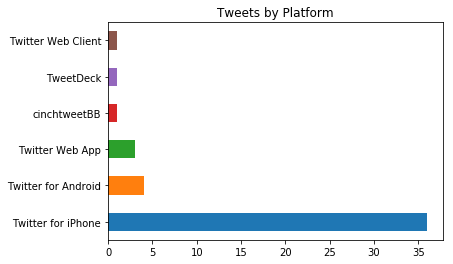

In [46]:
from matplotlib import pyplot as plt
data.short_source.value_counts().plot.barh()
plt.title('Tweets by Platform')
plt.show()